In [1]:
import pandas as pd
import math

In [3]:
retail_df = pd.read_excel('Online_Retail.xlsx')

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [7]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
## 인트인 것만 찾아라 그러니 개수가 확줄었음541909에서 397884로(index)

In [8]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [9]:
print(retail_df.shape)

(397884, 8)


In [10]:
retail_df.drop_duplicates(inplace=True)
##중복 레코드 제거

In [11]:
print(retail_df.shape)

(392692, 8)


In [12]:
pd.DataFrame([{'Product' : len(retail_df['StockCode'].value_counts()),
               'Transaction' : len(retail_df['InvoiceNo'].value_counts()),
               'Customer' : len(retail_df['CustomerID'].value_counts())}])

,Product,Transaction,Customer
0,3665,18532,4338


In [13]:
retail_df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [14]:
retail_df['SaleAmount'] = retail_df['UnitPrice'] * retail_df['Quantity']
##마케팅 이용 주문회수 주문총액 마지막주문후 몇일이 지났는지 계산
## 세일 어마운트값 컬럼 추가

In [15]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [16]:
aggregations = {
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
}

In [17]:
customer_df = retail_df.groupby('CustomerID').agg(aggregations)

In [18]:
customer_df

,InvoiceNo,SaleAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280,10,180.60,2011-03-07 09:52:00
18281,7,80.82,2011-06-12 10:53:00
18282,12,178.05,2011-12-02 11:43:00


In [19]:
customer_df = customer_df.reset_index()

In [20]:
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [21]:
customer_df = customer_df.rename(columns={'InvoiceNo' : 'Freq', 'InvoiceDate' : 'ElapsedDays'})
## 컬럼 이름 변경

In [22]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [23]:
import datetime

In [24]:
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
## 기준 날짜~ 마지막 구매일 까지의 시간 날짜 계산

In [25]:
customer_df.head(5)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [26]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
## 시간을 제외하고 날짜만 으로 출력

In [27]:
customer_df.head(5)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


## 데이터 분포 조정 하기

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

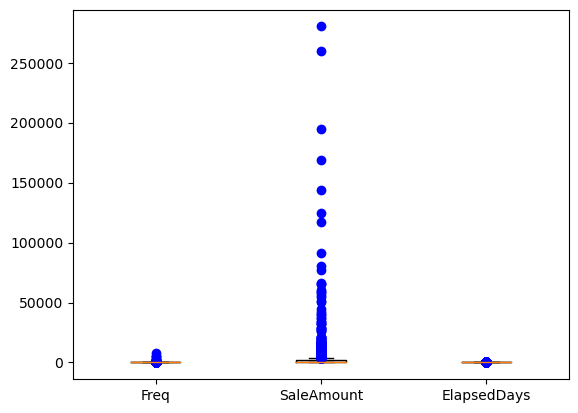

In [30]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'],customer_df['SaleAmount'],customer_df['ElapsedDays']],sym='bo')
plt.xticks([1,2,3], ['Freq', 'SaleAmount','ElapsedDays'])
plt.show()
# 작업이 한쪽으로 치우쳤는지 확인
##sym=do 는 파란색 점 이값이 지금 한쪽으로 치우쳐져있는깐 결과가 정확한게아님 
## 그래서 로그 함수를 적용하여 값의 분포를 고르게 조정.

##로그함수 적용 해서 값의 분포를 고르게 만들어 보자

In [31]:
import numpy as np

In [32]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

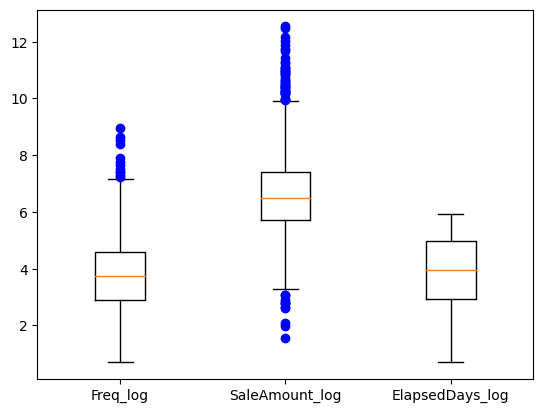

In [33]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'],customer_df['SaleAmount_log'],customer_df['ElapsedDays_log']],sym='bo')
plt.xticks([1,2,3], ['Freq_log', 'SaleAmount_log','ElapsedDays_log'])
plt.show()
## 완벽하지는 않지만 이정도로 만족하고 데이터 탐색 종료.

## k평균군집화 분석 모델 구축

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
x_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

In [36]:
x_features

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [37]:
from sklearn.preprocessing import StandardScaler
x_features_scaled = StandardScaler().fit_transform(x_features)

In [38]:
x_features_scaled

array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

In [39]:
distortions = []
for i in range(1, 11):
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(x_features_scaled)
  distortions.append(kmeans_i.inertia_)

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kimtp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kimtp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

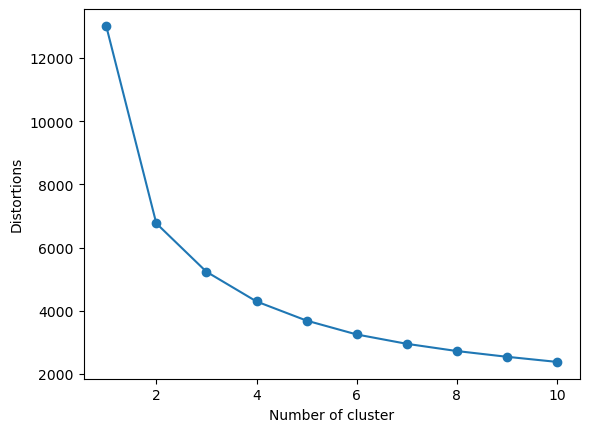

In [40]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortions')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [42]:
y_labels = kmeans.fit_predict(x_features_scaled)

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
customer_df['ClusterLabel'] = y_labels
# Y 레벨을 커스텀어 df 에 컬럼추가

In [44]:
customer_df.head(10)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,0
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,1
5,12352,85,2506.04,37,4.454347,7.826858,3.637586,2
6,12353,4,89.00,205,1.609438,4.499810,5.327876,1
7,12354,58,1079.40,233,4.077537,6.985087,5.455321,2
8,12355,13,459.40,215,2.639057,6.132096,5.375278,1
9,12356,59,2811.43,23,4.094345,7.941804,3.178054,0


## 결과 분석및 시각화

In [45]:
from matplotlib import cm

In [46]:
def silhouetteViz(n_cluster, x_features):
  kmeans = KMeans(n_clusters = n_cluster, random_state=0)
  y_labels = kmeans.fit_predict(x_features_scaled)

  silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean' )
  y_ax_lower, y_ax_upper = 0,0
  y_ticks = []

  for c in range(n_cluster):
    c_silhouette = silhouette_values[y_labels == c]
    c_silhouette.sort()
    y_ax_upper += len(c_silhouette)
    color = cm.jet(float(c) / n_cluster)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette, height = 1.0,
             edgecolor = 'none', color = color)
    y_ticks.append((y_ax_lower+y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette)

  silhouette_avg = np.mean(silhouette_values)
  plt.axvline(silhouette_avg, color= 'red', linestyle='--')
  plt.title('Number of Cluster : ' + str(n_cluster) + '\n' +
            'Silhouette Score : ' + str(round(silhouette_avg,3)))
  plt.yticks(y_ticks, range(n_cluster))
  plt.xticks([0,0.2,0.4,0.6,0.8,1])
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.tight_layout()
  plt.show()
## 각 클러스터 들으 가로바(barth()) 차트로 시각화 한다


C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


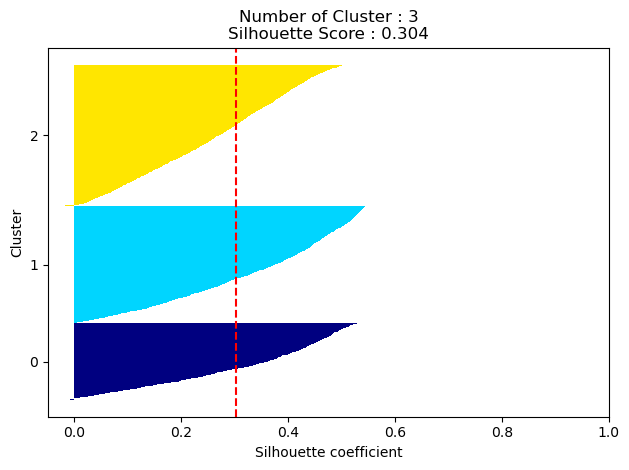

In [47]:
silhouetteViz(3, x_features_scaled)

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


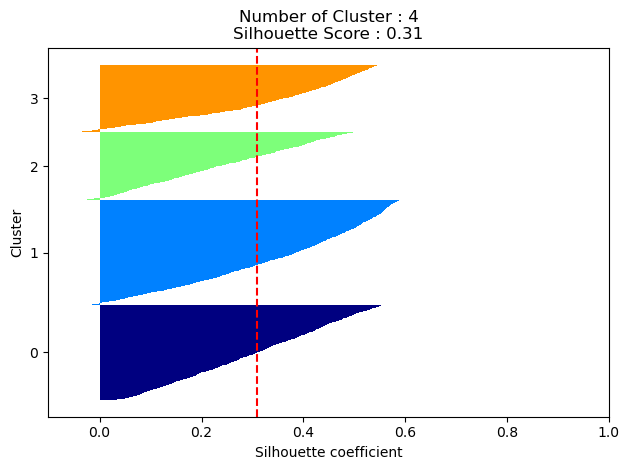

In [48]:
silhouetteViz(4, x_features_scaled)

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


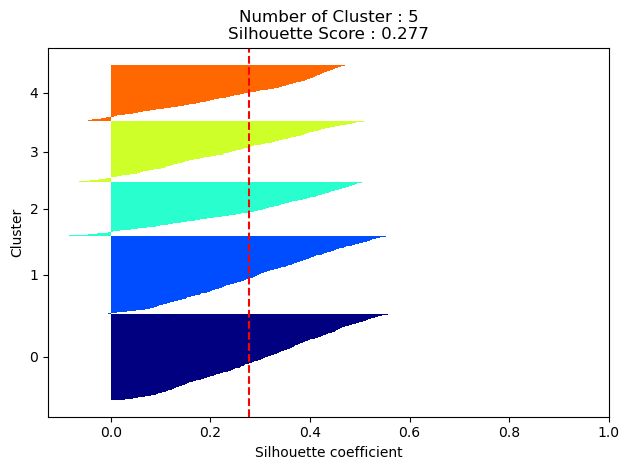

In [49]:
silhouetteViz(5, x_features_scaled)

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


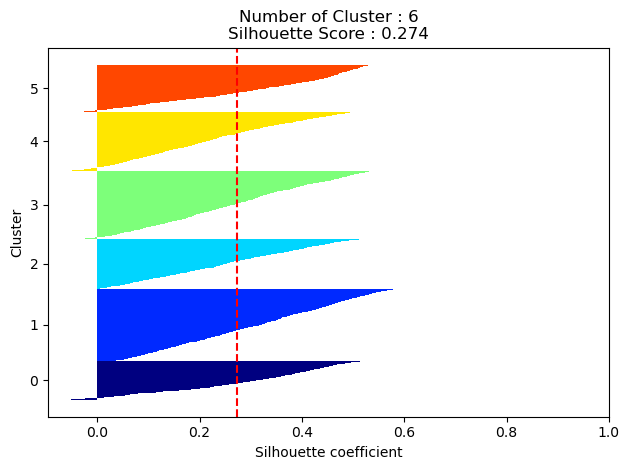

In [50]:
silhouetteViz(6, x_features_scaled)
## 4개가 평균적임

In [51]:
best_cluster = 4
kmean = KMeans(n_clusters=best_cluster, random_state=0)
Y_label = kmean.fit_predict(x_features_scaled)
## 클러스터 개수는 4개가 결과값이 좋음 최적의 개수

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
customer_df['ClusterLabel'] = Y_label

In [53]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,0
4,12350,17,334.40,311,2.890372,5.815324,5.743003,1


In [54]:
customer_df.to_csv('best_cluster_online_retail.csv')

In [55]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0    1229
1    1351
2     881
3     877
Name: CustomerID, dtype: int64

In [56]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'], axis = 1, inplace=False)

In [57]:
customer_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel
0,12346,1,77183.60,326,0
1,12347,182,4310.00,3,3
2,12348,31,1797.24,76,0
3,12349,73,1757.55,19,0
4,12350,17,334.40,311,1


In [58]:
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']

In [59]:
customer_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel,SaleAmountAvg
0,12346,1,77183.60,326,0,77183.600000
1,12347,182,4310.00,3,3,23.681319
2,12348,31,1797.24,76,0,57.975484
3,12349,73,1757.55,19,0,24.076027
4,12350,17,334.40,311,1,19.670588


In [60]:
customer_cluster_df.groupby('ClusterLabel').mean()

,CustomerID,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,,
0,15236.254679,79.180635,1510.934282,94.085435,101.576828
1,15384.166543,15.168024,299.222399,190.601776,43.140119
2,15362.988649,36.054484,579.860726,21.306470,33.134273
3,15198.416192,277.221209,6972.820867,13.440137,96.154866


In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf

In [6]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print(train_input.shape, train_target.shape)
##6만개의 이미지 28x28 크기, 타깃도 6만개

(60000, 28, 28) (60000,)


In [8]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


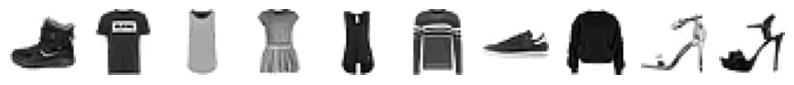

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  ax[i].imshow(train_input[i], cmap='gray_r')
  ax[i].axis('off')
plt.show()

In [10]:
print([train_target[i] for i in range(10)])
#0~9까지의 레이블로 정의 0은 티셔트 9는 앵클부츠 5는 샌달

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [11]:
import numpy as np
print(np.unique(train_target, return_counts = True))
#0~9까지 레이블 마다 6000개의 샘플이 들어있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


## 로지스틱 회귀로 패션 아이템 분류

In [12]:
train_scaled = train_input / 255.0

In [13]:
train_scaled = train_scaled.reshape(-1, 28*28)

In [14]:
print(train_scaled.shape)

(60000, 784)


In [32]:
import tensorflow as tf

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

In [34]:
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

In [35]:
score = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [36]:
print(np.mean(score['test_score']))

0.7899375


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [39]:
print(train_scaled.shape, train_target.shape)

(38400, 784) (38400,)


In [40]:
print(val_scaled.shape, val_target.shape)

(9600, 784) (9600,)


In [41]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [42]:
model = keras.Sequential(dense)

In [43]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [44]:
print(train_target[:10])

[9 4 9 0 4 9 3 6 4 7]


In [45]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6363 - accuracy: 0.7846
Epoch 2/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4872 - accuracy: 0.8351
Epoch 3/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4599 - accuracy: 0.8447
Epoch 4/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4450 - accuracy: 0.8502
Epoch 5/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.8519


In [46]:
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 0s 998us/step - loss: 0.4322 - accuracy: 0.8546


[0.4321952164173126, 0.8545833230018616]

## 심층 신경망 7-2

In [47]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))

In [48]:
dense2 = keras.layers.Dense(10, activation='softmax')

In [49]:
model = keras.Sequential([dense1,dense2])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 층을 추가하는 다른방법

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = '패션 MNIST 인공신경망 모델')

In [52]:
model.summary()

Model: "패션 MNIST 인공신경망 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))## 시그모이드

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [57]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6000 - accuracy: 0.7961
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4274 - accuracy: 0.8471
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3912 - accuracy: 0.8586
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3690 - accuracy: 0.8666
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3507 - accuracy: 0.8721


In [58]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))#2차원 데이터 28,28
model.add(keras.layers.Dense(100, activation='relu'))##렐루
model.add(keras.layers.Dense(10, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [62]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 784)


In [63]:
train_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16078431, 0.        ,
        0.        ]])

In [64]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [65]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [66]:
model.fit(train_scaled, train_target, epochs = 5)
#렐루 함수는 이미지 최적화에 좋은 코드 시그모어랑 비교하면

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5395 - accuracy: 0.8105
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3967 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3337 - accuracy: 0.8796
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8867


In [67]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3919 - accuracy: 0.8627


[0.39190176129341125, 0.8627499938011169]

In [68]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
#sgd 경사하강법

In [69]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [70]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [71]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5285 - accuracy: 0.8135
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8609
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3525 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3230 - accuracy: 0.8819
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3068 - accuracy: 0.8867


In [72]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3303 - accuracy: 0.8806


[0.33027905225753784, 0.8805833458900452]